# ROZPOZNAWANIE ZNAKÓW DROGOWYCH PRZY UŻYCIU CNN i Keras

## ZBIÓR DANYCH PROJEKTU

W projekcie użyliśmy publiczneego zbioru danych dostępnego w Kaggle:
https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
Zawiera on ponad 50 tys. różnych obrazów znaków drogowych, które klasyfikowane są w 43 różnych klasach. Niektóre z nich mają trochę więcej obrazów, niektóre zaś trochę mniej lecz są to małe różnice. Zestaw ten zawiera folder "Test" który posłuży nam do testowania naszego modelu.

## WSTĘP

Aby zainstalować nasz projket, pierwsze należy w terminalu wkleić poniższe polecenie

` pip install tensorflow keras sklearn matplotlib pandas pil `

Tensorflow - uczenie maszynowe i głębokie sieci neuronowe, napisana przez Google Brain Team.
Keras - Interface dla sztucznych sieci neuronowych. Interface dla Tensorflow.
Sklearn - biblioteka do uczenia maszynowego.
Matplotlib - biblioteka do tworzenia wykresów.
Pandas - manipulacja i analiza danych
pil - obsługa grafiki

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

## PRZEGLĄD ZBIORU DANYCH

Pobrany folder "Train" zawiera 43 foldery, z których każdy reprezentuje inną klasę. Moduł "os" służy do iterowania po wszystich klasach. Dołączamy obrazy i ich etykiety do listy danych i etykiet.
Biblioteka "PIL" służy do otwierania zawartości obrazu i zmniejszania go do odpowiednich rozmiarów.

In [10]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()
#Retrieving the images and their labels
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

Na koniec zapisaliśmy wszystkie obrazy i ich etykiety w listach.

Należy przekonwertować listę na tablicę numpy, aby zasilić model.

Kształt danych to (39209,30,30,3), co oznacza :
39209 - ilość obrazów,
30,30 - o rozmiarze 30x30 px,
ostatnia 3 - dane zawierają obrazy kolorowe (RGB)

Z pakietu sklearn używamy metody `train_test_split()` do dzielenia danych treningowych i testowych.

Z pakitu `keras.utils` używamy metody `to_categorical` do konwersji etykiet obecnych w `y_train` i `t_test` na kodowanie `one-hot`.

`one-hot` - to proces, w którym zmienne kategorialne są konwertowane do postaci, która może być dostarczana do algorytmów w celu lepszego przewidywania.

In [11]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


## Budowanie modelu CNN

Aby sklasyfikować obrazy do odpowiednich kategorii, zbudowaliśmy model CNN. CNN najlepiej nadaje się do celów klasyfikacji obrazów.

Architektura modelu:
- 2 warstwy Conv2D (filter=32, kernel_size=(5,5), activation=”relu”)
- warstwa MaxPool2D ( pool_size=(2,2))
- warstwa Dropout (rate=0.25)
- 2 warstwy Conv2D (filter=64, kernel_size=(3,3), activation=”relu”)
- warstwa MaxPool2D ( pool_size=(2,2))
- warstwa Dropout (rate=0.25)
- warstwa Flatten do zmiany warstw w 1 wymiarową
- warstwa Dense (256 nodes, activation=”relu”)
- warstwa Dropout (rate=0.5)
- warstwa Dense (43 nodes, activation=”softmax”)
Kompilujemy model za pomocą optymalizatora "adama", który działa dobrze, a "loss" to „categorical_crossentropy”, ponieważ mamy wiele klas do kategoryzacji.

In [12]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Uczenie i walidacja modelu

Trenujemy model za pomocą model.fit(). Po 15 "epochs" dokładność jest stablina.

In [13]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/15
981/981 [==============================] - 69s 69ms/step - loss: 1.8619 - accuracy: 0.5493 - val_loss: 0.2517 - val_accuracy: 0.9325
Epoch 2/15
981/981 [==============================] - 68s 70ms/step - loss: 0.4477 - accuracy: 0.8751 - val_loss: 0.1046 - val_accuracy: 0.9748
Epoch 3/15
981/981 [==============================] - 67s 68ms/step - loss: 0.2833 - accuracy: 0.9232 - val_loss: 0.0823 - val_accuracy: 0.9786
Epoch 4/15
981/981 [==============================] - 66s 68ms/step - loss: 0.2563 - accuracy: 0.9323 - val_loss: 0.0604 - val_accuracy: 0.9843
Epoch 5/15
981/981 [==============================] - 67s 68ms/step - loss: 0.2385 - accuracy: 0.9368 - val_loss: 0.0634 - val_accuracy: 0.9839
Epoch 6/15
981/981 [==============================] - 65s 67ms/step - loss: 0.2387 - accuracy: 0.9395 - val_loss: 0.1173 - val_accuracy: 0.9657
Epoch 7/15
981/981 [==============================] - 66s 67ms/step - loss: 0.2458 - accuracy: 0.9358 - val_loss: 0.0550 - val_accuracy:

Model uzyskał około 95% dokładności. Używając biblioteki `matplotlib` wyświetlamy wykres pod kątem dokładności i straty.

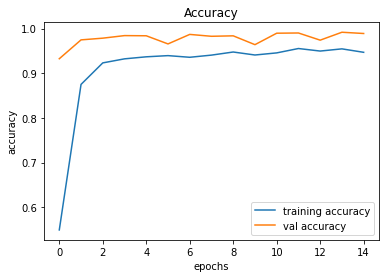

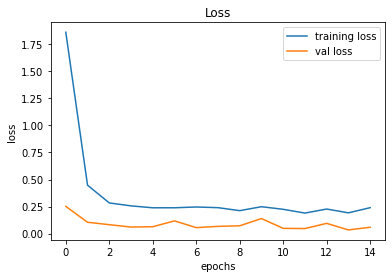

In [14]:
#plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## Testowanie modelu za pomocą testowego zestawu danych

Zestaw danych zawiera folder "test" a w pliku "test.csv" zawierają się szczegóły związane z ścieżką obrazu i odpowiednimi etykietami klas. Ścieżkę obrazu i etykiety wyodrębniamy za pomocą `pandas`. Następnie, aby przewidywać model, musimy zmienić rozmiar naszych obrazów do 30×30 pikseli i utworzyć tablicę numpy zawierającą wszystkie dane obrazu. Z `sklearn.metrics`, zaimportowaliśmy `accuracy_score`i zaobserwowaliśmy, jak model przewidywał rzeczywiste etykiety. W tym modelu dokładność wyosi 95%.

In [15]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)
# pred = model.predict_classes(X_test)
classes_x = model.predict(X_test)
pred = np.argmax(classes_x,axis=1)
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

395/395 [==============================] - 3s 8ms/step
0.9540775930324624


Na koniec model zapisywany jest do `traffic_classifier.h5` za pomocą funkcji `Keras model.save()`

In [16]:
model.save("traffic_classifier.h5")

# GUI
Zbudowane za pomocą "Tkinter". Jest to zestaw narzędzi do GUI.

W tym pliku załadowywany jest szykolony model `traffic_classifier.h5` za pomocą `Keras`. Następnie budowane jest GUI do przesyłania obrazu. Do klasyfikacji służy przycisk, który wywołuje funkcję `classify()`. `classify()` konwertuje obraz na wymiar kształtu (1, 30, 30, 3). Dzieje się tak, ponieważ aby przewidzieć znak drogowy, musimy podać ten sam wymiar, którego użyto podczas budowania modelu. Następnie przewidujemy klasę, `model.predict(image)` i `np.argmax()` zwraca nam liczbę pomiędzy (0-42), która reprezentuje klasę, do której należy. Użyto słownika, aby uzyskać informacje o klasie. Oto kod pliku gui.py.

In [17]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy
#load the trained model to classify sign
from keras.models import load_model
model = load_model('traffic_classifier.h5')
#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)',
            3:'Speed limit (50km/h)',
            4:'Speed limit (60km/h)',
            5:'Speed limit (70km/h)',
            6:'Speed limit (80km/h)',
            7:'End of speed limit (80km/h)',
            8:'Speed limit (100km/h)',
            9:'Speed limit (120km/h)',
            10:'No passing',
            11:'No passing veh over 3.5 tons',
            12:'Right-of-way at intersection',
            13:'Priority road',
            14:'Yield',
            15:'Stop',
            16:'No vehicles',
            17:'Veh > 3.5 tons prohibited',
            18:'No entry',
            19:'General caution',
            20:'Dangerous curve left',
            21:'Dangerous curve right',
            22:'Double curve',
            23:'Bumpy road',
            24:'Slippery road',
            25:'Road narrows on the right',
            26:'Road work',
            27:'Traffic signals',
            28:'Pedestrians',
            29:'Children crossing',
            30:'Bicycles crossing',
            31:'Beware of ice/snow',
            32:'Wild animals crossing',
            33:'End speed + passing limits',
            34:'Turn right ahead',
            35:'Turn left ahead',
            36:'Ahead only',
            37:'Go straight or right',
            38:'Go straight or left',
            39:'Keep right',
            40:'Keep left',
            41:'Roundabout mandatory',
            42:'End of no passing',
            43:'End no passing veh > 3.5 tons' }
#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Traffic sign classification')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    # pred = model.predict_classes([image])[0]
    classes_x = model.predict([image])[0]
    pred = numpy.argmax(classes_x,axis=0)
    sign = classes[pred+1]
    print(sign)
    label.configure(foreground='#011638', text=sign)
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

1/1 [==============================] - 0s 78ms/step
Speed limit (30km/h)
1/1 [==============================] - 0s 16ms/step
General caution
